<a href="https://colab.research.google.com/github/salonisngh/cognitive-computing/blob/main/CC_Assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1.  Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
technology, food, books, etc.).
1. Convert text to lowercase and remove punctua on.
2. Tokenize the text into words and sentences.
3. Remove stopwords (using NLTK's stopwords list).
4. Display word frequency distribu on (excluding stopwords).

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


-------------------------------------------------
Cleaned Text: i love food because it brings people together every dish has its own taste and story street food is fun and full of flavor cooking can be fun too like making something special for family food always makes me happy
-------------------------------------------------
-------------------------------------------------
Filtered Words: ['love', 'food', 'brings', 'people', 'together', 'every', 'dish', 'taste', 'story', 'street', 'food', 'fun', 'full', 'flavor', 'cooking', 'fun', 'like', 'making', 'something', 'special', 'family', 'food', 'always', 'makes', 'happy']
-------------------------------------------------
[('food', 3), ('fun', 2), ('love', 1), ('brings', 1), ('people', 1), ('together', 1), ('every', 1), ('dish', 1), ('taste', 1), ('story', 1)]
-------------------------------------------------


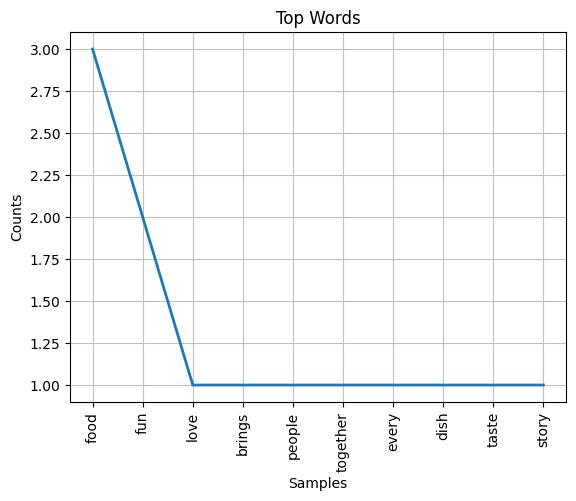

In [14]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
import nltk
import string

# Ensure required NLTK resources are downloaded
nltk.download('punkt')
nltk.download('stopwords')

print("-------------------------------------------------")
text = "I love food because it brings people together. Every dish has its own taste and story. Street food is fun and full of flavor. Cooking can be fun too, like making something special for family. Food always makes me happy!"

text_lower = text.lower()
text_clean = text_lower.translate(str.maketrans("", "", string.punctuation))
print("Cleaned Text:", text_clean)
print("-------------------------------------------------")

word_token = word_tokenize(text_clean)
sent_tokenized = sent_tokenize(text_clean)
print("-------------------------------------------------")

stop_words = set(stopwords.words('english'))
filtered_words = [w for w in word_token if w not in stop_words]
print("Filtered Words:", filtered_words)
print("-------------------------------------------------")

fd = FreqDist(filtered_words)
print(fd.most_common(10))
fd.plot(10, title="Top Words")
print("-------------------------------------------------")


Q2: Stemming and Lemma za on
1. Take the tokenized words from Ques on 1 (a er stopword removal).
2. Apply stemming using NLTK's PorterStemmer and LancasterStemmer.
3. Apply lemma za on using NLTK's WordNetLemma zer.
4. Compare and display results of both techniques.

In [18]:
import pandas as pd
from nltk.stem import PorterStemmer, WordNetLemmatizer ,LancasterStemmer
nltk.download('wordnet')

ps = PorterStemmer()
lm = WordNetLemmatizer()
ln= LancasterStemmer()
data = []
for word in filtered_words:
    port_stemmer=ps.stem(word)
    wordnet_lemmatizer=lm.lemmatize(word)
    lancaster_stemmer=ln.stem(word)

    data.append([word,port_stemmer,wordnet_lemmatizer,lancaster_stemmer])

df=pd.DataFrame(data,columns=["WORDS","PORT STEMMEMR","WORDNET LEMMATIZER","LANCASTER STEMMER"])
display(df)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,WORDS,PORT STEMMEMR,WORDNET LEMMATIZER,LANCASTER STEMMER
0,love,love,love,lov
1,food,food,food,food
2,brings,bring,brings,bring
3,people,peopl,people,peopl
4,together,togeth,together,togeth
5,every,everi,every,every
6,dish,dish,dish,dish
7,taste,tast,taste,tast
8,story,stori,story,story
9,street,street,street,street


Q3. Regular Expressions and Text Spliting
1. Take their original text from Ques on 1.
2. Use regular expressions to:

a. Extract all words with more than 5 leters.

b. Extract all numbers (if any exist in their text).

c. Extract all capitalized words.

3. Use text spliting techniques to:

a. Split the text into words containing only alphabets (removing digits and special
characters).

b. Extract words star ng with a vowel.




In [23]:
import re
text = "I love food because it brings people together. Every dish has its own taste and story. Street food is fun and full of flavor. Cooking can be fun too, like making something special for family. Food always makes me happy!"

pattern=r"\b\w{6,}\b"
long_words=re.findall(pattern,text)
print("Words more than 5 words: ",long_words)

numbers = re.findall(r'\b\d+\b', text)
print("Numbers:", numbers)

capitalized_words = re.findall(r'\b[A-Z][a-zA-Z]*\b', text)
print("Capitalized words:", capitalized_words)

alpha_words = re.findall(r'\b[a-zA-Z]+\b', text)
print("Alphabet-only words:", alpha_words)

vowel_words = [word for word in alpha_words if re.match(r'^[aeiouAEIOU]', word)]
print("Words starting with a vowel:", vowel_words)



Words more than 5 words:  ['because', 'brings', 'people', 'together', 'Street', 'flavor', 'Cooking', 'making', 'something', 'special', 'family', 'always']
Numbers: []
Capitalized words: ['I', 'Every', 'Street', 'Cooking', 'Food']
Alphabet-only words: ['I', 'love', 'food', 'because', 'it', 'brings', 'people', 'together', 'Every', 'dish', 'has', 'its', 'own', 'taste', 'and', 'story', 'Street', 'food', 'is', 'fun', 'and', 'full', 'of', 'flavor', 'Cooking', 'can', 'be', 'fun', 'too', 'like', 'making', 'something', 'special', 'for', 'family', 'Food', 'always', 'makes', 'me', 'happy']
Words starting with a vowel: ['I', 'it', 'Every', 'its', 'own', 'and', 'is', 'and', 'of', 'always']


Q4. Custom Tokenization on & Regex-based Text Cleaning
1. Take original text from Ques on 1.
2. Write a custom tokenization on func on that:

a. Removes punctua on and special symbols, but keeps contrac ons (e.g.,
"isn't" should not be split into "is" and "n't").

b. Handles hyphenated words as a single token (e.g., "state-of-the-art" remains
a single token).

c. Tokenizes numbers separately but keeps decimal numbers intact (e.g., "3.14"
should remain as is).

3. Use Regex Subs tu ons (re.sub) to:

a. Replace email addresses with '<EMAIL>' placeholder.

b. Replace URLs with '<URL>' placeholder.

c. Replace phone numbers (formats: 123-456-7890 or +91 9876543210) with
'<PHONE>' placeholder.

In [37]:
text = "I love food because it brings people together. Every dish has its own taste and story. Street food is fun and full of flavor. Cooking can be fun too, like making something special for family. Food always makes me happy!"
print(text)

print("----------------------------------------------")

pattern=r"\b\w+(?:'\w+)?\b"
cust_token=re.findall(pattern,text)
print(cust_token)

print("----------------------------------------------")

pattern2=r"\b\w+(?:-\w+)*\b|\d+\.\d+|\w+'\w+"
contract_token=re.findall(pattern2,text)
print(contract_token)

print("----------------------------------------------")

sample = "My email is example@email.com, you can visit my website at https://www.example.com or call me at 123-456-7890 or +91 9876543210."
print("Before:", sample)


sample = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', '', sample)


sample = re.sub(r'\b(?:\+?\d{1,3}[-\s]?)?\d{3}[-\s]?\d{3}[-\s]?\d{4}\b', '', sample)


sample = re.sub(r'https?://\S+|www\.\S+', '', sample)

print("After:", sample)



I love food because it brings people together. Every dish has its own taste and story. Street food is fun and full of flavor. Cooking can be fun too, like making something special for family. Food always makes me happy!
----------------------------------------------
['I', 'love', 'food', 'because', 'it', 'brings', 'people', 'together', 'Every', 'dish', 'has', 'its', 'own', 'taste', 'and', 'story', 'Street', 'food', 'is', 'fun', 'and', 'full', 'of', 'flavor', 'Cooking', 'can', 'be', 'fun', 'too', 'like', 'making', 'something', 'special', 'for', 'family', 'Food', 'always', 'makes', 'me', 'happy']
----------------------------------------------
['I', 'love', 'food', 'because', 'it', 'brings', 'people', 'together', 'Every', 'dish', 'has', 'its', 'own', 'taste', 'and', 'story', 'Street', 'food', 'is', 'fun', 'and', 'full', 'of', 'flavor', 'Cooking', 'can', 'be', 'fun', 'too', 'like', 'making', 'something', 'special', 'for', 'family', 'Food', 'always', 'makes', 'me', 'happy']
----------------